length of target:  28
avrg. number of iterations:  244.6


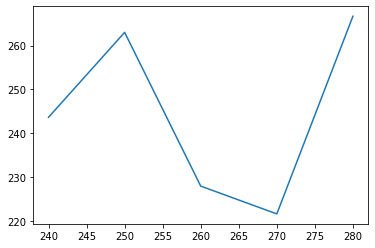

In [8]:
# evolutionary algo: eval aspect impact (mut, mate, fit, length, repro rate)
from string import ascii_letters
from random import choice, random
import matplotlib.pyplot as plt
import math

def fitness(trial, target):
    'Sum of matching chars by position - essentially the dot product'
    return sum(t==h for t,h in zip(trial, target))
    #return sum([sum([trl[i]==tgt[i+w] for w in range(-1,2)]) for i in range(1,len(trl)-1)]) # window
    #return sum((ord(t)*math.log(ord(h)+0.001) for t,h in zip(trial, target))) # cross entropy

def mutaterate(parent, target, perfectfitness, minmutaterate):
    'Less mutation the closer the fit of the parent'
    return 1 - ((perfectfitness - fitness(parent, target)) / perfectfitness * (1 - minmutaterate))

def mutate(parent, rate, charset):
    '''take character from parent or choose a random character from the vocabulary'''
    return [(ch if random() <= rate else choice(charset)) for ch in parent] # below rate char survives, otherwise choose

def que(iterations, parent, target, perfectfitness):
    '(from the favourite saying of Manuel in Fawlty Towers)'
    print ("#%-4i, fitness: %4.1f%%, '%s'" %
           (iterations, fitness(parent, target)*100./perfectfitness, ''.join(parent)))

def mate(a, b, target, splice_rt=7):
    '''combine genes by splicing a and b at a random position'''
    place = 0
    if choice(range(10)) < splice_rt: # splice rate
        place = choice(range(len(target)))
        #fa = fitness(a, target) # this logic improves iterations by about 20%
        #fb = fitness(b, target)
        #place = int(fa / (fa+fb) * len(target) )
    else:
        return a, b
    return a, b, a[:place] + b[place:], b[:place] + a[place:] # splice a and b

def evorun(C, parent, charset, target, splice_rt, perfectfitness, minmutaterate):
    '''a set of runs with given parameters'''
    iterations = 0
    center = int(len(C)/2)
    while parent != target and iterations < 1000:
        rate = mutaterate(parent, target, perfectfitness, minmutaterate)
        iterations += 1
        #if iterations % 100 == 0: que(iterations, parent, target, perfectfitness)
        copies = [ mutate(parent, rate, charset) for _ in C ]  + [parent] # create a set of copies, but mutated
        parent1 = max(copies[:center], key=lambda x: fitness(x, target)) # best parent from lower half
        parent2 = max(copies[center:], key=lambda x: fitness(x, target)) # best parent from upper half
        parent = max(mate(parent1, parent2, target, splice_rt), key=lambda x: fitness(x, target)) # choose best mutation from both bet parents
    #que(iterations, parent, target, perfectfitness)
    return (iterations)
    
def main():
    target  = list("METHINKS IT IS LIKE A WEASEL")
    print('length of target: ', len(target))
    charset = ascii_letters + ' '
    parent  = [choice(charset) for _ in range(len(target))] # random init choice
    minmutaterate  = .09
    #C = range(200)
    perfectfitness = float(len(target))
    splice_rt = 8
    #C_base = [25,50,100,200,300]
    C_base = [240,250,260,270,280]
    #C_base = [250, 270]
    C_rg = [range(x) for x in C_base]
    niter = []
    ntrls = 3
    #for sr in [1,2,3,4,5,6,7,8,9]:
    for cc in C_rg:
        navrg = 0.
        for _ in range(ntrls):
            navrg += evorun(cc, parent, charset, target, splice_rt, perfectfitness, minmutaterate)
        niter.append(navrg / ntrls)
    #niter = [niter[i] / C_base[i] for i in range(len(niter))] # scale by computational complexity of gene length
    print('avrg. number of iterations: ', sum(niter) / len(C_base))
    plt.plot(C_base, niter)
    #plt.plot([1,2,3,4,5,6,7,8,9], niter)
    plt.show()

if __name__ == '__main__':
    main()

In [7]:
# happy numbers

def happyn(n):
    '''return true if n is happy'''
    past = set()
    while n != 1:
        n = sum(int(i)**2 for i in str(n))
        if n in past:
            return False
        past.add(n)
    return True

def main():
    print([x for x in range(500) if happyn(x)])

if __name__ == '__main__':
    main()

[1, 7, 10, 13, 19, 23, 28, 31, 32, 44, 49, 68, 70, 79, 82, 86, 91, 94, 97, 100, 103, 109, 129, 130, 133, 139, 167, 176, 188, 190, 192, 193, 203, 208, 219, 226, 230, 236, 239, 262, 263, 280, 291, 293, 301, 302, 310, 313, 319, 320, 326, 329, 331, 338, 356, 362, 365, 367, 368, 376, 379, 383, 386, 391, 392, 397, 404, 409, 440, 446, 464, 469, 478, 487, 490, 496]


length of target:  10
avrg. number of iterations:  126.99999999999997


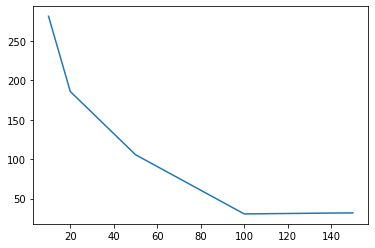

length of target:  20
avrg. number of iterations:  487.8


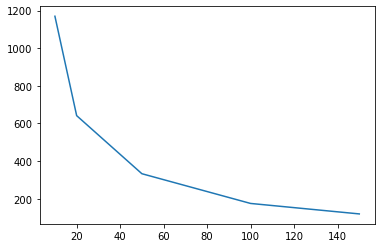

length of target:  30
avrg. number of iterations:  882.0


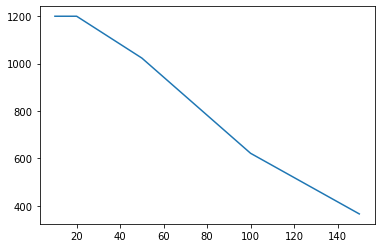

length of target:  40
avrg. number of iterations:  1200.0


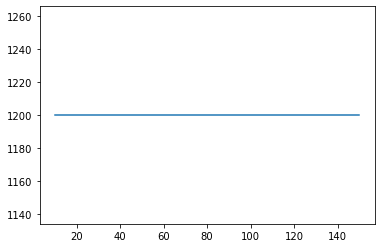

In [16]:
# evolutionary algo: relate target length and gene length
from string import ascii_letters
from random import choice, random
import matplotlib.pyplot as plt
import math

def fitness(trial, target):
    'Sum of matching chars by position - essentially the dot product'
    return sum(t==h for t,h in zip(trial, target))
    #return sum([sum([trl[i]==tgt[i+w] for w in range(-1,2)]) for i in range(1,len(trl)-1)]) # window
    #return sum((ord(t)*math.log(ord(h)+0.001) for t,h in zip(trial, target))) # cross entropy

def mutaterate(parent, target, perfectfitness, minmutaterate):
    'Less mutation the closer the fit of the parent'
    return 1 - ((perfectfitness - fitness(parent, target)) / perfectfitness * (1 - minmutaterate))

def mutate(parent, rate, charset):
    '''take character from parent or choose a random character from the vocabulary'''
    return [(ch if random() <= rate else choice(charset)) for ch in parent] # below rate char survives, otherwise choose

def que(iterations, parent, target, perfectfitness):
    '(from the favourite saying of Manuel in Fawlty Towers)'
    print ("#%-4i, fitness: %4.1f%%, '%s'" %
           (iterations, fitness(parent, target)*100./perfectfitness, ''.join(parent)))

def mate(a, b, target, splice_rt=7, mthd=0):
    '''combine genes by splicing a and b at a random position'''
    place = 0
    if choice(range(10)) < splice_rt: # splice rate
        if mthd == 0:
            place = choice(range(len(target)))
        else:
            fa = fitness(a, target) # this logic improves iterations by about 20%
            fb = fitness(b, target)
            place = int(fa / (fa+fb) * len(target) )
    else:
        return a, b
    return a, b, a[:place] + b[place:], b[:place] + a[place:] # splice a and b

def evorun(C, parent, charset, target, splice_rt, perfectfitness, minmutaterate, maxiter=1200):
    '''a set of runs with given parameters'''
    iterations = 0
    center = int(len(C)/2)
    while parent != target and iterations < maxiter:
        rate = mutaterate(parent, target, perfectfitness, minmutaterate)
        iterations += 1
        #if iterations % 100 == 0: que(iterations, parent, target, perfectfitness)
        copies = [ mutate(parent, rate, charset) for _ in C ]  + [parent] # create a set of copies, but mutated
        parent1 = max(copies[:center], key=lambda x: fitness(x, target)) # best parent from lower half
        parent2 = max(copies[center:], key=lambda x: fitness(x, target)) # best parent from upper half
        parent = max(mate(parent1, parent2, target, splice_rt), key=lambda x: fitness(x, target)) # choose best mutation from both bet parents
    #que(iterations, parent, target, perfectfitness)
    return (iterations)
    
def main():
    charset = ascii_letters + ' '
    for thislen in [10, 20, 30, 40]:
        #target  = list("METHINKS IT IS LIKE A WEASEL")
        target = [choice(charset) for _ in range(thislen)]
        print('length of target: ', len(target))
        parent  = [choice(charset) for _ in range(len(target))] # random init choice
        minmutaterate  = .09
        perfectfitness = float(len(target))
        splice_rt = 7
        C_base = [10, 20, 50, 100, 150]
        C_rg = [range(x) for x in C_base]
        niter = []
        ntrls = 3
        #for sr in [1,2,3,4,5,6,7,8,9]:
        for cc in C_rg:
            navrg = 0.
            for _ in range(ntrls):
                navrg += evorun(cc, parent, charset, target, splice_rt, perfectfitness, minmutaterate)
            niter.append(navrg / ntrls)
        #niter = [niter[i] / C_base[i] for i in range(len(niter))] # scale by computational complexity of gene length
        print('avrg. number of iterations: ', sum(niter) / len(C_base))
        plt.plot(C_base, niter)
        #plt.plot([1,2,3,4,5,6,7,8,9], niter)
        plt.show()

if __name__ == '__main__':
    main()

In [1]:
# evolutionary algo: small demo
from string import ascii_letters
from random import choice, random
import matplotlib.pyplot as plt
import math

def fitness(trial, target):
    'Sum of matching chars by position - essentially the dot product'
    return sum(t==h for t,h in zip(trial, target))

def mutaterate(parent, target, perfectfitness, minmutaterate):
    'Less mutation the closer the fit of the parent'
    return 1 - ((perfectfitness - fitness(parent, target)) / perfectfitness * (1 - minmutaterate))

def mutate(parent, rate, charset):
    '''take character from parent or choose a random character from the vocabulary'''
    return [(ch if random() <= rate else choice(charset)) for ch in parent] # below rate char survives, otherwise choose

def que(iterations, parent, target, perfectfitness):
    '(from the favourite saying of Manuel in Fawlty Towers)'
    print ("#%-4i, fitness: %4.1f%%, '%s'" %
           (iterations, fitness(parent, target)*100./perfectfitness, ''.join(parent)))

def mate(a, b, target, OPSCTR, splice_rt=7, mthd=0):
    '''combine genes by splicing a and b at a random position'''
    place = 0
    if choice(range(10)) < splice_rt: # splice rate
        if mthd == 0:
            place = choice(range(len(target)))
        else:
            fa = fitness(a, target) # this logic improves iterations by about 20%
            fb = fitness(b, target)
            place = int(fa / (fa+fb) * len(target) )
    else:
        return a, b
    return a, b, a[:place] + b[place:], b[:place] + a[place:] # splice a and b

def evorun(C, parent, charset, target, splice_rt, perfectfitness, minmutaterate, maxiter=700):
    '''a set of runs with given parameters'''
    iterations = 0
    OPSCTR = []
    center = int(len(C)/2)
    while parent != target and iterations < maxiter:
        nops = 0
        rate = mutaterate(parent, target, perfectfitness, minmutaterate)
        iterations += 1
        if iterations % 100 == 0: que(iterations, parent, target, perfectfitness)
        copies = [ mutate(parent, rate, charset) for _ in C ]  + [parent] # create a set of copies, but mutated
        nops += len(parent)*len(C)
        #print('copies: ', OPSCTR)
        parent1 = max(copies[:center], key=lambda x: fitness(x, target)) # best parent from lower half
        nops += len(target)*len(target)
        #print('parent1: ', OPSCTR)
        parent2 = max(copies[center:], key=lambda x: fitness(x, target)) # best parent from upper half
        nops += len(target)*len(target)
        #print('parent2: ', OPSCTR)
        parent = max(mate(parent1, parent2, target, splice_rt), key=lambda x: fitness(x, target)) # choose best mutation from both bet parents
        nops += len(parent1)*len(target)
        #print('parent: ', OPSCTR)
        OPSCTR.append(nops)
    que(iterations, parent, target, perfectfitness)
    return (iterations, OPSCTR)
   
def main():
    nops = [] # count basic operations
    charset = ascii_letters + ' '
    target = [choice(charset) for _ in range(10)]
    print('target: ', target)
    print('length of target: ', len(target))
    parent  = [choice(charset) for _ in range(len(target))] # random init choice
    minmutaterate  = .09
    perfectfitness = float(len(target))
    splice_rt = 7
    C_base = [3]
    C_rg = [range(x) for x in C_base]
    niter, nops = evorun(C_rg[0], parent, charset, target, splice_rt, perfectfitness, minmutaterate)
    print(nops[0])

if __name__ == '__main__':
    main()

target:  ['D', 'p', 'A', 'v', 'i', 'A', 'B', 'B', 'X', 'Z']
length of target:  10
#100 , fitness: 40.0%, 'DpA wfBwTW'
#200 , fitness: 60.0%, 'DpAFiVBBZl'
#300 , fitness: 70.0%, 'DpAfinOBXZ'
#374 , fitness: 100.0%, 'DpAviABBXZ'
330


In [3]:
# wait for file creation
import os
import time

file_path = r'bsc_resids0.txt'

os.chdir(r'C:\Users\bscho\Documents\DL\lrgtxt0')
print(os.path.isfile(file_path))

max_wt = 10
wtng = 0
while not os.path.isfile(file_path) and wtng < max_wt:
    time.sleep(1)
    wtng += 1

if os.path.isfile(file_path):
    # read file
    pass
else:
    raise ValueError("%s isn't a file!" % file_path)

True


In [10]:
# lcm

def lcm(a, b, niter=100):
    '''least common multiple'''
    ni = 0
    ar = a
    br = b
    while ni < niter:
        while ar<br:
            ar += a
        if ar == br: return ar
        while br<ar:
            br += b
        if ar == br: return ar
        ni += 1
    return ar*br
        
def main():
    print(lcm(23, 48))

if __name__ == '__main__':
    main()

1104
